In [8]:
# importing all necessary libraries
import os
import random
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# function to read images from dataset
def read_images_from_folder(folder_path, num_images_per_class):
    images = []
    labels = []
    classes = os.listdir(folder_path)
    for class_name in classes:
        class_path = os.path.join(folder_path, class_name)
        filenames = os.listdir(class_path)
        selected_filenames = random.sample(filenames, num_images_per_class)
        for filename in selected_filenames:
            img_path = os.path.join(class_path, filename)
            img = Image.open(img_path)
            img_array = np.array(img).reshape(-1)  # Flatten the image into a 1D array
            images.append(img_array)
            labels.append(class_name)
    return images, labels

In [3]:
# defining path of train and test set images
train_folder_path = 'Dataset/train'
test_folder_path = 'Dataset/test'

# selecting number of images to train and test on
num_train_images = 40000
num_test_images = 10000

# reading images
train_images, train_labels = read_images_from_folder(train_folder_path, num_train_images)
test_images, test_labels = read_images_from_folder(test_folder_path, num_test_images)

In [4]:
# converting the labels to numerical values
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

In [5]:
# normalizing data
scaler = StandardScaler()
train_images_normalized = scaler.fit_transform(train_images)
test_images_normalized = scaler.transform(test_images)

In [6]:
inertia_values = []
for k in range(1, 11):  # trying different values of K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_images_normalized)
    inertia_values.append(kmeans.inertia_)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

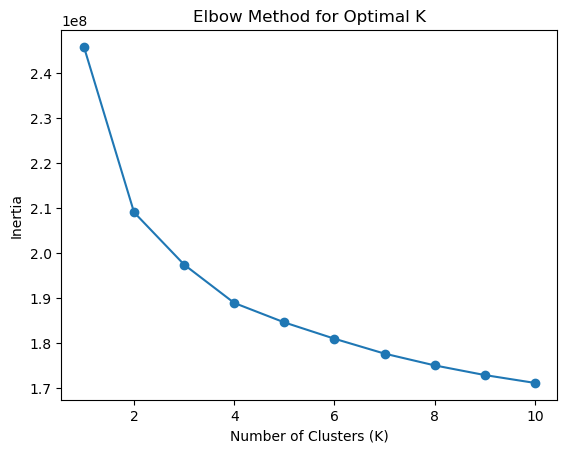

In [9]:
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [14]:
# training KMeans
optimal_k = 2
kmeans = KMeans(n_clusters = optimal_k, random_state = 42)
kmeans.fit(train_images_normalized)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [15]:
test_predictions = kmeans.predict(test_images_normalized)

In [16]:
conf_matrix = confusion_matrix(test_labels_encoded, test_predictions)
accuracy = accuracy_score(test_labels_encoded, test_predictions)

In [17]:
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy Score:", accuracy)

Confusion Matrix:
[[2822 1397 5781]
 [3126 2912 3962]
 [   0    0    0]]

Accuracy Score: 0.2867
